# <center> CFRM521 Machine Learning in Finance
## <center> Lecture 0
### <center> Yoshihiro Shirai

# Cheat Sheets

- Linear Algebra with Numpy

- Classification and regression with scipy

- Statistics with sklearn

# 1. Numpy cheat sheet

Listed below are some basic numpy functions

In [2]:
import numpy as np

# Array Creation
a = np.array([1, 2, 3]) # Create a 1D array (Note: can also use np.asarray)
b = np.array([[1, 2, 3], [4, 5, 6]]) # Create a 2D array
c = np.zeros((2, 3)) # Create an array of zeros
d = np.ones((2, 3)) # Create an array of ones
e = np.eye(3) # Create an identity matrix
f = np.random.rand(2, 3) # Create an array with random values
g = np.linspace(0, 1, 5) # Create an array with evenly spaced values
h = np.arange(0, 10, 2) # Create an array with a range of values
i = np.empty((2, 3)) # Create an empty array
j = np.full((2, 3), 7) # Create an array filled with a constant value
k = np.random.randint(0, 10, size=(2, 3)) # Create an array with random integers
l = np.random.normal(0, 1, size=(2, 3)) # Create an array with random normal values
m = np.random.choice([1, 2, 3], size=(2, 3)) # Create an array with random choices

# Array Operations
a.shape # Get the shape of the array
a.size # Get the number of elements in the array
a.dtype # Get the data type of the array

# Array Indexing and Slicing
a[0] # Access the first element
b[1, 2] # Access the element at row 1, column 2
a[1: 3] # Slice the array from index 1 to 3 (exclusive)
b[:, 0] # Access all rows in the first column
b[0, :] # Access all columns in the first row

# Array Mathematics
a + 1 # Add 1 to each element
a * 2 # Multiply each element by 2
a + a # Add two arrays element-wise
a * a # Multiply two arrays element-wise
np.sin(a) # Calculate the sine of each element
np.dot(a, a) # Dot product of two arrays

# Array Manipulation
a.reshape(3, 1) # Reshape the array to 3 rows and 1 column
b.reshape(3, 2) # Reshape the array
b.T # Transpose the array
b.flatten() # Flatten the array to 1D
np.concatenate((a, a)) # Concatenate arrays
np.unique(a) # Get unique elements in the array
np.sort(a) # Sort the array
np.argsort(a) # Get the indices that would sort the array

# Array Statistics
np.mean(a) # Calculate the mean
np.median(a) # Calculate the median
np.std(a) # Calculate the standard deviation
np.max(a) # Calculate the maximum
np.min(a) # Calculate the minimum
np.sum(a) # Calculate the sum
np.prod(a) # Calculate the product



np.int64(6)

Here are some additional tips to remember

- NumPy arrays are more memory-efficient than Python lists as the support vectorized operations, and enable fast computation via optimized C-based functions.

- np.dot() vs. np.matmul() – np.dot() handles both dot products and matrix multiplication, whereas np.matmul() explicitly performs matrix multiplication.

- Broadcasting allows operations on arrays of different shapes by automatically expanding one to match the other's shape.

- np.array() vs. np.asarray() – np.array() creates a new array, while np.asarray() converts an input to an array without copying if it's already a NumPy array.

- Element-wise operations – Use operators like +, -, *, /, or functions like np.add(), np.multiply().

- np.meshgrid() – Generates coordinate grids for vectorized evaluations over a mesh. Useful for plotting and interpolation.

- Handling missing values – Typically represented as np.nan. Use np.isnan() to detect them or np.nanmean() to compute means ignoring NaNs.


An example of using vectorized operations

In [22]:
import time

# Function to calculate the sum of squares for a range of numbers
def sum_of_squares(start, end):
    return sum(x ** 2 for x in range(start, end))

def sum_of_squares2(start, end):
    x = np.arange(start, end, dtype=np.float64)
    return np.sum(x**2) # dot product of x with itself

def sum_of_squares3(start, end):
    x = np.arange(start, end, dtype=np.float64)
    return np.dot(x, x) # dot product of x with itself
    # note: dtype is important for large numbers to avoid overflow

total_numbers = 50_000_000

start_time = time.time()
list_based = sum_of_squares(0, total_numbers)
print(f"Single-threaded Result based on list comprehension: {list_based}")
print(f"Time with list comprehension: {time.time() - start_time:.2f} seconds")

start_time = time.time()
numpy_based = sum_of_squares2(0, total_numbers)
print(f"Single-threaded Result based on broadcasting in numpy: {numpy_based}")
print(f"Time with broadcasting in numpy: {time.time() - start_time:.2f} seconds")

start_time = time.time()
numpy_based = sum_of_squares3(0, total_numbers)
print(f"Single-threaded Result based on np.dot: {numpy_based}")
print(f"Time with numpy np.dot: {time.time() - start_time:.2f} seconds")


Single-threaded Result based on list comprehension: 41666665416666675000000
Time with list comprehension: 3.75 seconds
Single-threaded Result based on broadcasting in numpy: 4.1666665416667345e+22
Time with broadcasting in numpy: 0.29 seconds
Single-threaded Result based on np.dot: 4.166666541666818e+22
Time with numpy np.dot: 0.09 seconds


# Sklearn cheat sheet

## 1. Download and process data and train a model

In [43]:
# Importing Libraries for Machine Learning
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 2. Compare multiple models

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Define a pipeline with named steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', LogisticRegression())  # Model step (can be replaced dynamically)
])

# Define a parameter grid for multiple models
param_grid = [
    {'model': [LogisticRegression(random_state=42)], 'model__C': [0.1, 1, 10]},
    {'model': [RandomForestClassifier(random_state=42)], 'model__n_estimators': [50, 100, 200]},
    {'model': [SVC(random_state=42)], 'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']},
    {'model': [GradientBoostingClassifier(random_state=42)], 'model__n_estimators': [50, 100, 200]},
    {'model': [XGBClassifier(random_state=42)], 'model__n_estimators': [50, 100, 200]}
]

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print("Best Model:", best_model)
print("Best Parameters:", grid_search.best_params_)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=10, kernel='linear', random_state=42))])
Best Parameters: {'model': SVC(random_state=42), 'model__C': 10, 'model__kernel': 'linear'}
Accuracy: 0.9777777777777777


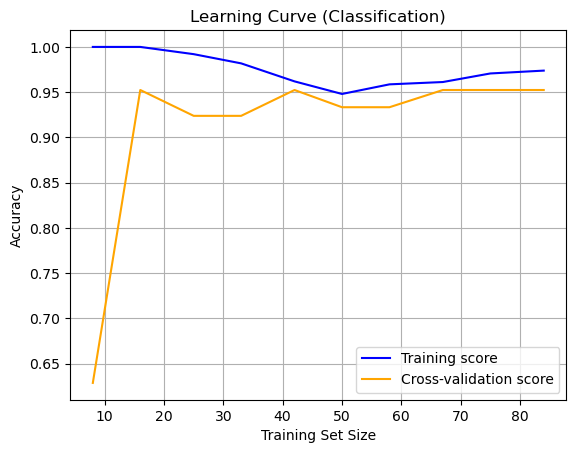

In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="orange")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Example: Plot learning curve for the best classification model
plot_learning_curve(grid_search.best_estimator_, X_train, y_train, "Learning Curve (Classification)")

## 3. Regression

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with feature selection and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('feature_selection', SelectKBest(score_func=f_regression, k=5)),  # Select top 5 features
    ('model', Ridge())  # Ridge regression model
])

# Define a parameter grid for Ridge regression
param_grid = {
    'model__alpha': [0.1, 1.0, 10.0, 100.0]  # Different values for the Ridge penalty
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print("Best Model:", best_model)
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with Grid Search: {mse}")

# Get the selected features
selected_features = best_model.named_steps['feature_selection'].get_support()
print(f"Selected Features: {selected_features}")

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x0000023D058C63E0>)),
                ('model', Ridge(alpha=10.0))])
Best Parameters: {'model__alpha': 10.0}
Mean Squared Error with Grid Search: 0.5317638406568354
Selected Features: [ True  True  True False False False  True  True]


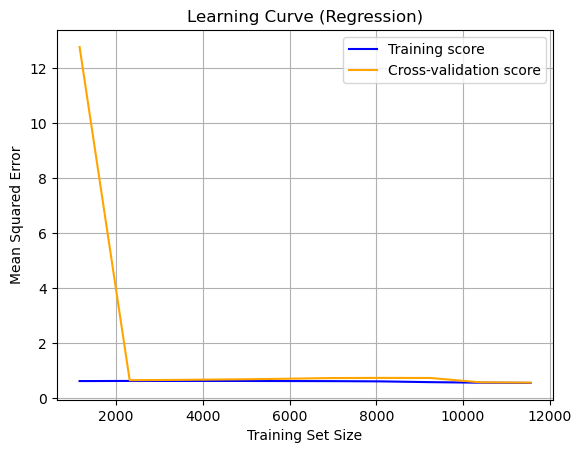

In [47]:
# Function to plot learning curve for regression
def plot_learning_curve_regression(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = -np.mean(train_scores, axis=1)  # Convert negative MSE to positive
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="orange")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Example: Plot learning curve for the best regression model
plot_learning_curve_regression(grid_search.best_estimator_, X_train, y_train, "Learning Curve (Regression)")

## 4. Additional Remarks

- Key features of Sklearn – Provides easy-to-use machine learning algorithms, preprocessing tools, model selection techniques, and built-in datasets.

- Handling missing data – Use SimpleImputer or dropna() to replace or remove missing values.

- fit(), transform(), fit_transform() – fit() learns parameters, transform() applies them, fit_transform() does both in one step.

- Cross-validation – Can also be implemented via cross_val_score() or GridSearchCV for hyperparameter tuning.

- Pipelines – Used for automating preprocessing and model fitting (Pipeline from sklearn.pipeline).

- Feature selection – Use SelectKBest, RFE, or model-based selection (e.g., Lasso regression).

- Model evaluation metrics – Common metrics include accuracy, precision, recall, F1-score for classification; MSE, RMSE, R² for regression.


# Basic statistics in Python

## 1. Descriptive statistics using Numpy

In [ ]:
### Example: Basic Statistics with NumPy
import numpy as np

data = np.array([12, 15, 14, 10, 18, 20, 25])

print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Standard Deviation:", np.std(data))
print("Variance:", np.var(data))

Mean: 16.285714285714285
Median: 15.0
Standard Deviation: 4.7423407636279515
Variance: 22.489795918367346


## 2. Confidence interval estimation using scipy

In [ ]:
import numpy as np
import scipy.stats as stats

data = np.random.normal(loc=50, scale=10, size=30)  # Sample 1

mean = np.mean(data)
std_err = stats.sem(data)  # Standard Error
conf_interval = stats.t.interval(confidence=0.95, df=len(data)-1, loc=mean, scale=std_err)

print("95% Confidence Interval:", conf_interval)
print("Mean:", mean)
print("Standard Error:", std_err)

95% Confidence Interval: (np.float64(48.31825168056459), np.float64(55.382967580712396))
Mean: 51.850609630638495
Standard Error: 1.7271204549873767


## 3. Hypothesis testing using scipy

### 3.1 Unilateral test on population sample mean

In [164]:
import numpy as np
from scipy import stats

# Generate a normally distributed sample
sample = np.random.normal(loc=50, scale=10, size=30)  # Sample with mean=50, std=10

# Hypothesized population mean
mu_0 = 54

# Perform a one-tailed t-test (greater than)
t_stat, p_value = stats.ttest_1samp(sample, mu_0)

# Adjust p-value for one-tailed test
p_value_one_tailed = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)

# Degrees of freedom
df = len(sample) - 1

# Compute critical t-value for one-tailed test at alpha = 0.05
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha, df)

# Print results
print("Sample Mean:", np.mean(sample))
print("T-Statistic:", t_stat)
print("One-Tailed P-Value:", p_value_one_tailed)
print("Critical t (one-tailed):", t_critical)

if t_stat > t_critical:
    print("Reject Null Hypothesis: Sample mean is significantly greater than", mu_0)
else:
    print("Fail to Reject Null Hypothesis: No significant evidence that sample mean is greater than", mu_0)

Sample Mean: 49.19037037777624
T-Statistic: -2.6065688346598774
One-Tailed P-Value: 0.9928540841092711
Critical t (one-tailed): 1.6991270265334972
Fail to Reject Null Hypothesis: No significant evidence that sample mean is greater than 54


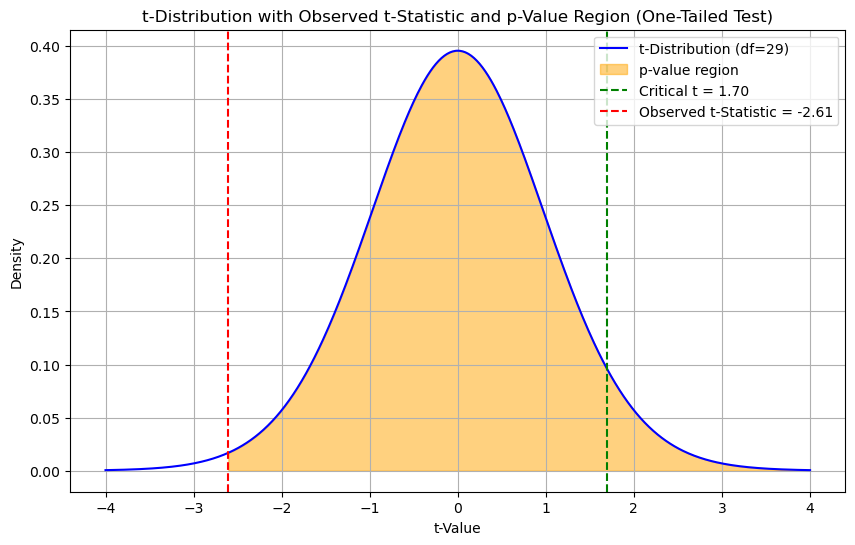

Sample Mean: 49.19037037777624
T-Statistic: -2.6065688346598774
One-Tailed P-Value: 0.9928540841092711
Critical t (one-tailed): 1.6991270265334972
Fail to Reject Null Hypothesis: No significant evidence that sample mean is greater than 54


In [165]:
# Generate t-distribution
x = np.linspace(-4, 4, 500)  # Range of t-values
t_dist = stats.t.pdf(x, df)  # Probability density function of t-distribution

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label=f"t-Distribution (df={df})", color="blue")

# Shade the p-value region
plt.fill_between(x, 0, t_dist, where=(x >= t_stat), color="orange", alpha=0.5, label="p-value region")

# Add vertical lines for critical t-value and observed t-statistic
plt.axvline(t_critical, color="green", linestyle="--", label=f"Critical t = {t_critical:.2f}")
plt.axvline(t_stat, color="red", linestyle="--", label=f"Observed t-Statistic = {t_stat:.2f}")

# Add labels and legend
plt.title("t-Distribution with Observed t-Statistic and p-Value Region (One-Tailed Test)")
plt.xlabel("t-Value")
plt.ylabel("Density")
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Print results
print("Sample Mean:", np.mean(sample))
print("T-Statistic:", t_stat)
print("One-Tailed P-Value:", p_value_one_tailed)
print("Critical t (one-tailed):", t_critical)

if t_stat > t_critical:
    print("Reject Null Hypothesis: Sample mean is significantly greater than", mu_0)
else:
    print("Fail to Reject Null Hypothesis: No significant evidence that sample mean is greater than", mu_0)

### 3.2 Two tails test for two random variables to have same mean assuming equal variance

In [92]:
from scipy import stats

sample1 = np.random.normal(loc=50, scale=10, size=30)  # Sample 1
sample2 = np.random.normal(loc=55, scale=10, size=30)  # Sample 2

# Test that two samples have identical average values
t_stat, p_value = stats.ttest_ind(sample1, sample2) # assume unknown, equal variance
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis (Significant Difference)")
else:
    print("Fail to Reject Null Hypothesis (No Significant Difference)")

T-Statistic: -2.6339701381681278
P-Value: 0.01080249697278819
Reject Null Hypothesis (Significant Difference)


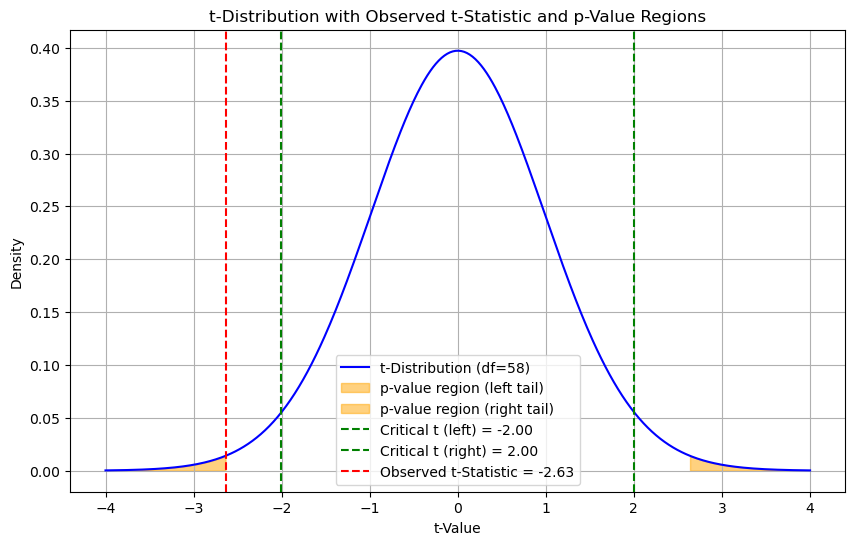

T-Statistic: -2.6339701381681278
P-Value: 0.010802496972788234
Critical t (left): -2.001717484145236
Critical t (right): 2.0017174841452356


In [93]:
# Degrees of freedom
df = len(sample1) + len(sample2) - 2

# Correct calculation of p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Generate t-distribution
x = np.linspace(-4, 4, 500)  # Range of t-values
t_dist = stats.t.pdf(x, df)  # Probability density function of t-distribution

# Compute critical t-values for a two-tailed test at alpha = 0.05
alpha = 0.05
t_critical_left = stats.t.ppf(alpha / 2, df)  # Left critical value (2.5%)
t_critical_right = stats.t.ppf(1 - alpha / 2, df)  # Right critical value (97.5%)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label="t-Distribution (df={})".format(df), color="blue")

# Shade the p-value regions
plt.fill_between(x, 0, t_dist, where=(x <= -abs(t_stat)), color="orange", alpha=0.5, label="p-value region (left tail)")
plt.fill_between(x, 0, t_dist, where=(x >= abs(t_stat)), color="orange", alpha=0.5, label="p-value region (right tail)")

# Add vertical lines for critical t-values
plt.axvline(t_critical_left, color="green", linestyle="--", label=f"Critical t (left) = {t_critical_left:.2f}")
plt.axvline(t_critical_right, color="green", linestyle="--", label=f"Critical t (right) = {t_critical_right:.2f}")

# Add vertical lines for observed t-statistic
plt.axvline(t_stat, color="red", linestyle="--", label=f"Observed t-Statistic = {t_stat:.2f}")

# Add labels and legend
plt.title("t-Distribution with Observed t-Statistic and p-Value Regions")
plt.xlabel("t-Value")
plt.ylabel("Density")
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)
print("Critical t (left):", t_critical_left)
print("Critical t (right):", t_critical_right)

In [94]:
from scipy import stats
import numpy as np

# Generate two normally distributed samples
sample1 = np.random.normal(loc=50, scale=10, size
                           =50)  # Sample 1
sample2 = np.random.normal(loc=55, scale=15, size=50)  # Sample 2 (different variance)

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis (Significant Difference)")
else:
    print("Fail to Reject Null Hypothesis (No Significant Difference)")

T-Statistic: -2.637049030009495
P-Value: 0.010000254365774567
Reject Null Hypothesis (Significant Difference)


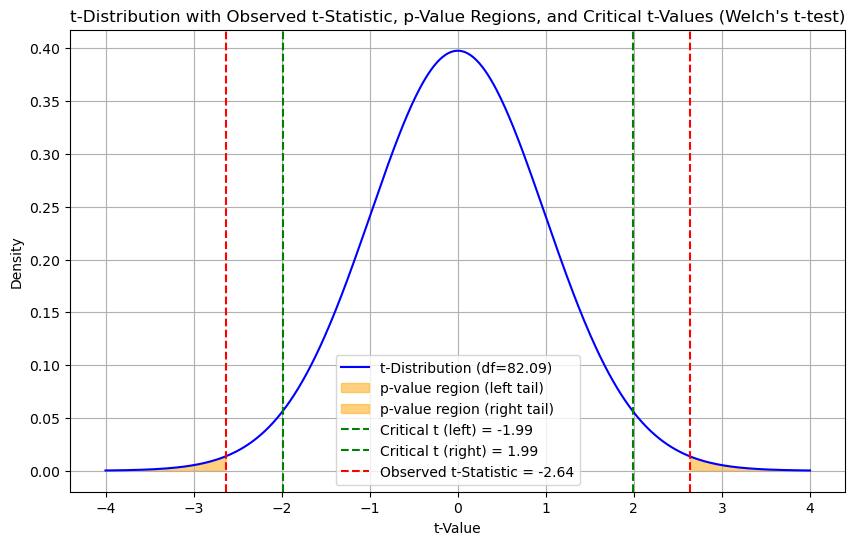

T-Statistic: -2.637049030009495
P-Value: 0.010000254365774567
Degrees of Freedom (Welch): 82.08516887207179
Critical t (left): -1.9892876550007272
Critical t (right): 1.989287655000727


In [95]:
# Calculate Welch's degrees of freedom
n1, n2 = len(sample1), len(sample2)
s1, s2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)  # Sample variances
numerator = (s1 / n1 + s2 / n2) ** 2
denominator = ((s1 / n1) ** 2 / (n1 - 1)) + ((s2 / n2) ** 2 / (n2 - 1))
df_welch = numerator / denominator

# Compute critical t-values for a two-tailed test at alpha = 0.05
alpha = 0.05
t_critical_left = stats.t.ppf(alpha / 2, df_welch)  # Left critical value (2.5%)
t_critical_right = stats.t.ppf(1 - alpha / 2, df_welch)  # Right critical value (97.5%)

# Generate t-distribution
x = np.linspace(-4, 4, 500)  # Range of t-values
t_dist = stats.t.pdf(x, df_welch)  # Probability density function of t-distribution

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label=f"t-Distribution (df={df_welch:.2f})", color="blue")

# Shade the p-value regions
plt.fill_between(x, 0, t_dist, where=(x <= -abs(t_stat)), color="orange", alpha=0.5, label="p-value region (left tail)")
plt.fill_between(x, 0, t_dist, where=(x >= abs(t_stat)), color="orange", alpha=0.5, label="p-value region (right tail)")

# Add vertical lines for critical t-values
plt.axvline(t_critical_left, color="green", linestyle="--", label=f"Critical t (left) = {t_critical_left:.2f}")
plt.axvline(t_critical_right, color="green", linestyle="--", label=f"Critical t (right) = {t_critical_right:.2f}")

# Add vertical lines for observed t-statistic
plt.axvline(t_stat, color="red", linestyle="--", label=f"Observed t-Statistic = {t_stat:.2f}")
plt.axvline(-t_stat, color="red", linestyle="--")

# Add labels and legend
plt.title("t-Distribution with Observed t-Statistic, p-Value Regions, and Critical t-Values (Welch's t-test)")
plt.xlabel("t-Value")
plt.ylabel("Density")
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)
print("Degrees of Freedom (Welch):", df_welch)
print("Critical t (left):", t_critical_left)
print("Critical t (right):", t_critical_right)

### 3.3 Non independent case

In [117]:
from scipy import stats
import numpy as np

# Generate two related samples (e.g., before and after treatment)
before = np.random.normal(loc=50, scale=10, size=30)  # Measurements before treatment
after = before + np.random.normal(loc=2.5, scale=10, size=30)  # Measurements after treatment

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(before, after)

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis (Significant Difference)")
else:
    print("Fail to Reject Null Hypothesis (No Significant Difference)")

T-Statistic: -1.8440987482846838
P-Value: 0.07540784279017484
Fail to Reject Null Hypothesis (No Significant Difference)


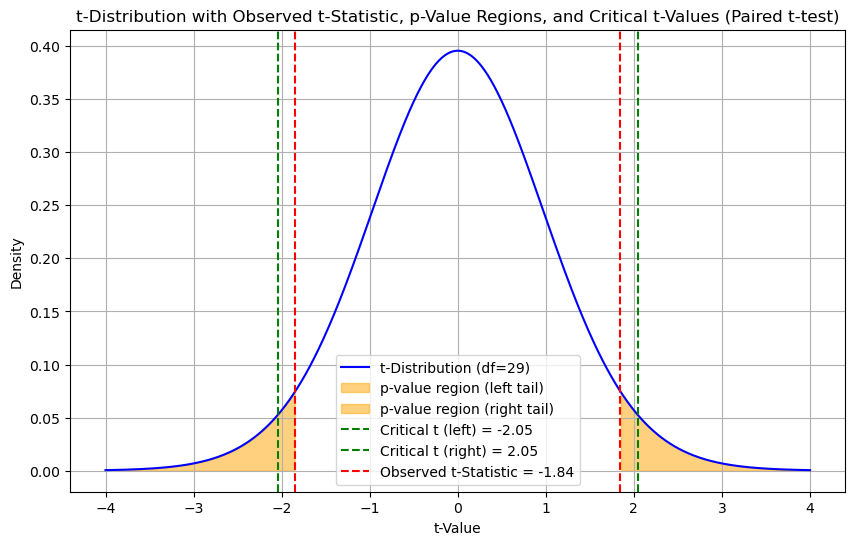

T-Statistic: -1.8440987482846838
P-Value: 0.07540784279017484
Degrees of Freedom: 29
Critical t (left): -2.0452296421327034
Critical t (right): 2.045229642132703


In [118]:
# Degrees of freedom
df = len(before) - 1

# Compute critical t-values for a two-tailed test at alpha = 0.05
alpha = 0.05
t_critical_left = stats.t.ppf(alpha / 2, df)  # Left critical value (2.5%)
t_critical_right = stats.t.ppf(1 - alpha / 2, df)  # Right critical value (97.5%)

# Generate t-distribution
x = np.linspace(-4, 4, 500)  # Range of t-values
t_dist = stats.t.pdf(x, df)  # Probability density function of t-distribution

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label=f"t-Distribution (df={df})", color="blue")

# Shade the p-value regions
plt.fill_between(x, 0, t_dist, where=(x <= -abs(t_stat)), color="orange", alpha=0.5, label="p-value region (left tail)")
plt.fill_between(x, 0, t_dist, where=(x >= abs(t_stat)), color="orange", alpha=0.5, label="p-value region (right tail)")

# Add vertical lines for critical t-values
plt.axvline(t_critical_left, color="green", linestyle="--", label=f"Critical t (left) = {t_critical_left:.2f}")
plt.axvline(t_critical_right, color="green", linestyle="--", label=f"Critical t (right) = {t_critical_right:.2f}")

# Add vertical lines for observed t-statistic
plt.axvline(t_stat, color="red", linestyle="--", label=f"Observed t-Statistic = {t_stat:.2f}")
plt.axvline(-t_stat, color="red", linestyle="--")

# Add labels and legend
plt.title("t-Distribution with Observed t-Statistic, p-Value Regions, and Critical t-Values (Paired t-test)")
plt.xlabel("t-Value")
plt.ylabel("Density")
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", df)
print("Critical t (left):", t_critical_left)
print("Critical t (right):", t_critical_right)